## 1. Encàrrec de productora
<p><img src="https://cdn.pixabay.com/photo/2018/10/09/00/21/netflix-3733812_960_720.jpg" alt="foto pelicula"></p>
<p>Una de les productores més importants del mercat ens ha demant fer un anàlisis històric abans d'invertir en una nova pel·lìcula.</p>
<p>Haurem de donar repsposta a diferents preguntes com: </p>

*   La popularitat de les pel·lícules han disminuït durant els anys
*   Quins gènere tenen millor valoracions
*   Les pel·lícules que ofereixen un millor benefici proporcional son les de més pressupost
*   Quins gèneres ofereixen més benefici.
*   Proposa una idea de pel·lìcula
*   Surt a compte fer una segona part?

<p>Per realitzar aquest anàlisis disposem dels següents set de dades:.</p>

*  movies.p: pel·lìcula data i espectadors
*   movie_to_genres.p: gènere de cada pel·lìcula
*   financial.p: dades econòmiques de cada pel·lìcula
*   sequels.p: relació de les pelìcules i les seves sequeles.
*   ratings.p: valoració de les pel·lìcules




In [1828]:
import pandas as pd
#importem dataset i en visualitzem el contigut

movies_ds = pd.read_pickle('DATABASE/movies.p')
movie_to_genres_ds = pd.read_pickle('DATABASE/movie_to_genres.p')
financial_ds = pd.read_pickle('DATABASE/financials.p')
sequels_ds = pd.read_pickle('DATABASE/sequels.p')
ratings_ds = pd.read_pickle('DATABASE/ratings.p')

print(movies_ds.head())
print(movie_to_genres_ds.head())
print(financial_ds.head())
print(sequels_ds.head())
print(ratings_ds.head())

      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17
   movie_id            genre
0         5            Crime
1         5           Comedy
2        11  Science Fiction
3        11           Action
4        11        Adventure
       id     budget       revenue
0   19995  237000000  2.787965e+09
1     285  300000000  9.610000e+08
2  206647  245000000  8.806746e+08
3   49026  250000000  1.084939e+09
4   49529  260000000  2.841391e+08
      id         title  sequel
0  19995        Avatar    <NA>
1    862     Toy Story     863
2    863   Toy Story 2   10193
3    597       Titanic    <NA>
4  24428  The Avengers    <NA>
       id  vote_average  vote_count
0   19995           7.2     11800.0
1     285           6.



---



## Anàlisis de la popularitat

L'empresa creu que durant els darrers anys les pel·lícules tenen menys popularitat. Vol que ho comprovem gràficament

Primer de tot importarem el nostre dataset i analitzarem les seves dades bàsiques ¿Quina es la popularitat mitja i la més alta?

In [1829]:
#Analitzem el dataset movies, el tipus de les seves variables, el seu tamany i els seus estadístics bàsics
movies_ds.info()
movies_ds.describe()
# La popularitat mitja és 21.492301
# La més alta és 875.581305

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4803 non-null   int64  
 1   title         4803 non-null   object 
 2   popularity    4803 non-null   float64
 3   release_date  4802 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 150.2+ KB


,id,popularity
count,4803.000000,4803.000000
mean,57165.484281,21.492301
std,88694.614033,31.816650
min,5.000000,0.000000
25%,9014.500000,4.668070
50%,14629.000000,12.921594
75%,58610.500000,28.313505
max,459488.000000,875.581305


Necessitem treballar amb el camp release_date com a datatime, així que transformem la columna i ho comprovem. ¿De quin fins a quin any tenim dades?

In [1830]:
#Necessitem treballar amb el camp release_date com a datatime, així que creem la columna year i ho comprovem
movies_ds['release_date'] = pd.to_datetime(movies_ds['release_date'])
movies_ds['year'] = movies_ds['release_date'].dt.year
print(movies_ds.head())
# Observem max i min
print(movies_ds['year'].max())
print(movies_ds['year'].min())
# Tenim Dades des de l'any 1916 fins a l'any 2017

      id                 title  popularity release_date    year
0    257          Oliver Twist   20.415572   2005-09-23  2005.0
1  14290  Better Luck Tomorrow    3.877036   2002-01-12  2002.0
2  38365             Grown Ups   38.864027   2010-06-24  2010.0
3   9672              Infamous    3.680896   2006-11-16  2006.0
4  12819       Alpha and Omega   12.300789   2010-09-17  2010.0
2017.0
1916.0


L'empresa considera que els gustos han canviat molt durant els últims anys, aixi que nomès l'interessen les dades desde el 2010. ¿De cuàntes dades disposem? ¿De cuàntes dades disposem?

In [1831]:
#Filtrem el nostre dataset
peliculesDesde2010 = movies_ds.query('year > 2009')
peliculesDesde2010.shape
# Disposem de línies i 5 columnes

(1446, 5)

Pasem a mostrar la linea temporal de com ha variat la popularitat durant els darrers anys. 

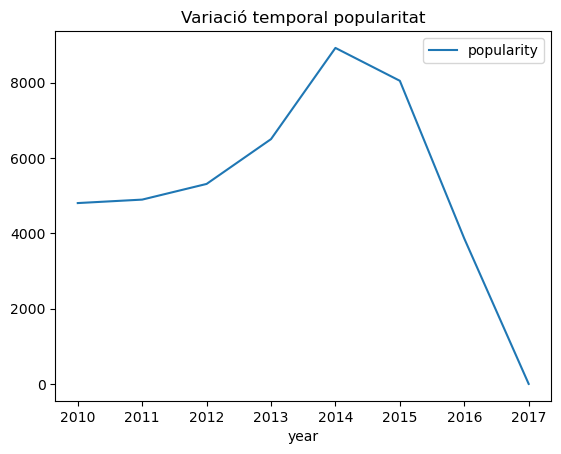

In [1832]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt
#Agrupem per any i obtenim la suma de la popularitat
popularitatAny = peliculesDesde2010.groupby('year').agg({'popularity':'sum'})
#mostre la variació temporal
popularitatAny.plot(kind="line")
plt.title("Variació temporal popularitat")
plt.show()

¿Què passa al 2017, quin és el motiu? Igualment aquesta devadalla és molt extranya, és probalble a que en alguns anys s'hagin realitzat moltes més pel·lícules i que per aquesta raó la mitja sigui molt més alta. Anem a fer el mateix procediment amb la mitja

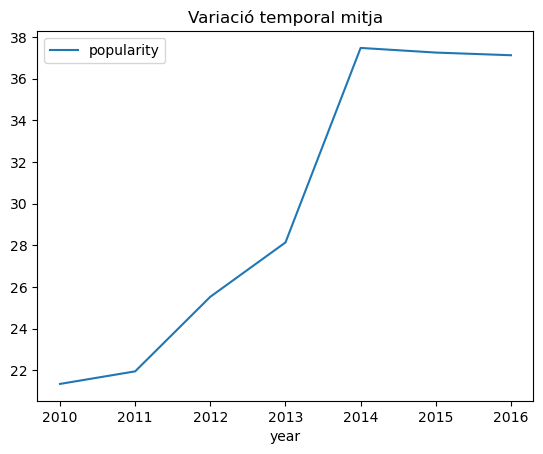

In [1833]:
# Agrupem i obtenir la mitja de la popularitat (no tenim en compte 2017)
peliculesDesde2010 = peliculesDesde2010.query('year != 2017')
mitjaPopularitat = peliculesDesde2010.groupby('year').agg({'popularity':'mean'})
#mostre la variació temporal
mitjaPopularitat.plot(kind='line')
plt.title("Variació temporal mitja")
plt.show()

### Resposta 1. Estan perdent popularitat les pel·lìcules?

No

## Anàlisis del rating

Un cop decidit que val la pena realitzar una pel·lìcula, haurem de valorar de quina gènere val la pena en funció de la seva valoració. Primer de tot mostrarem la puntuació mitja de les pel·lícules i les 10 pel·lìcules més valorades. Mostra únicament el nom i el títol de la pel·lìcula ( i el index que surt per defecte)

In [1834]:
#Haurem de fer una join entre els dos datasets implicats (recordar que nomès ens interesa pel·lìcules a partir del 2010)
movies_ratings_ds = pd.merge(movies_ds, ratings_ds, how='inner')
# Nomès ens interessa les grans produccions, pel·lìcules amb més de 60k de popularitat i més de 2000 valoracions
peliculesMesValorades = movies_ratings_ds.query('popularity > 60 and vote_count > 2000')
#Mostrem pel·lìcules
peliculesMesValorades.sort_values(by='vote_average', ascending=False)[['title','vote_average']].head(10)

,title,vote_average
2162,The Shawshank Redemption,8.5
169,The Godfather,8.4
1556,The Godfather: Part II,8.3
2850,Fight Club,8.3
1605,Schindler's List,8.3
1268,Spirited Away,8.3
3254,Pulp Fiction,8.3
3998,Whiplash,8.3
343,The Empire Strikes Back,8.2
3110,American History X,8.2


De les pel·lìcules que ens interessa pel nostre anàlisis ( més de 60k de popularitat i més de 2000 valoracions) obtindrem el seu gènere per mostra gràficament la mitja per gènere.

In [1835]:
#Mirem primer el tamany del nostre dataset filtrar
print(peliculesMesValorades.shape)
#Realitzem la join
peliculesMesValorades = pd.merge(peliculesMesValorades, movie_to_genres_ds, left_on='id', right_on='movie_id')
peliculesMesValorades = peliculesMesValorades.drop(columns=['movie_id'])
#Mirem el tamany del data set resultant
print(peliculesMesValorades.shape)


(271, 7)
(816, 8)


¿Quin és el motiu que els tamany dels dataset siguin diferents?

Perque s'ha creat una nova línia per cada génere de la película.

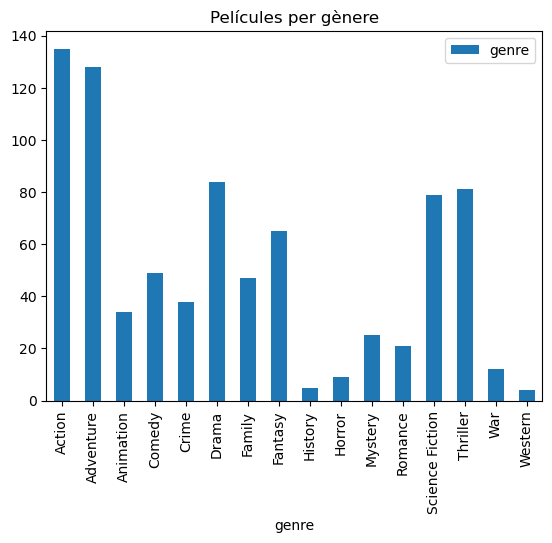

In [1836]:
#Mostrem gràfic de barres per gènere
peliculesMesValorades.groupby('genre').agg({'genre':'count'}).plot(kind="bar")
plt.title("Películes per gènere")
plt.show()

¿Quins son el tres gèneres amb millor valoració?

In [1837]:
# Mostrem gènres amb millor valoració
millorsValoracions = peliculesMesValorades.groupby("genre").agg({'vote_average':'mean'})
millorsValoracions.sort_values(by='vote_average', ascending=False).head(3)
# Historia, Oest i Drama

,vote_average
genre,
History,7.960000
Western,7.700000
Drama,7.466667




---



## Anàlisis econòmic

Observa el dataset financial i els seus estadìstics bàsics. ¿Quin és el pressupost i els ingressos promig?¿Sembla rentable fer una pel·lìcula?

In [1838]:
#Observem dataset financials
financial_ds.describe()
#El pressupost promig és 4.065444e+07 i els ingresos 1.212430e+08
#Fer una película és rentable

,id,budget,revenue
count,3229.000000,3.229000e+03,3.229000e+03
mean,44780.705791,4.065444e+07,1.212430e+08
std,74609.434723,4.439674e+07,1.863029e+08
min,5.000000,1.000000e+00,5.000000e+00
25%,4958.000000,1.050000e+07,1.700000e+07
50%,11451.000000,2.500000e+07,5.518472e+07
75%,45272.000000,5.500000e+07,1.462920e+08
max,417859.000000,3.800000e+08,2.787965e+09


Mostra la distribució (histograma) del pressupost de les pel·lícules. ¿La majoria de pel·lìcules son de baix o alt pressupost?

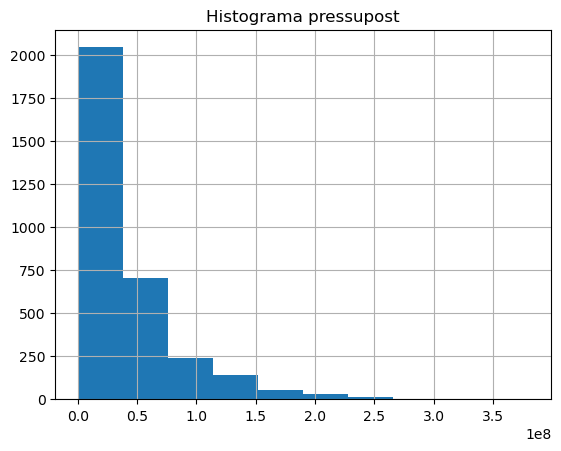

In [1839]:
# Histograma
financial_ds['budget'].hist()
plt.title("Histograma pressupost")
plt.show()
# La majoría són de baix pressupost

Volem mostrar ( nom inclòs) les pel·lìcules les 5 pel·lícules mès profitosses i les 5 més deficitàries de la historia.

In [1840]:
#Calculem la columna profit
financial_ds["profit"] = financial_ds["revenue"] - financial_ds["budget"]
#Merge amb movies
movies_financial_ds = pd.merge(movies_ds, financial_ds, how='inner')
#Mostrem 5 millors i 5 pitjors
print(movies_financial_ds.groupby('title').agg({'profit':'max'}).sort_values(by='profit', ascending=False).head())
print(movies_financial_ds.groupby('title').agg({'profit':'max'}).sort_values(by='profit').head())

                      profit
title                       
Avatar          2.550965e+09
Titanic         1.645034e+09
Jurassic World  1.363529e+09
Furious 7       1.316249e+09
The Avengers    1.299558e+09
                                   profit
title                                    
The Lone Ranger              -165710090.0
The Alamo                    -119180039.0
Mars Needs Moms              -111007242.0
The 13th Warrior              -98301101.0
The Adventures of Pluto Nash  -92896027.0


Ens tornem a centrar en les pel·lìcules que interessen a la productora ( > 2010 i amb alt grau de popularitat). Per fer una bona inversió no només ens interessa en el indicador 'profit' sino també el 'prop_profit' la proporció entre els beneficis i la quantitat que s'ha invertit en realizat la película. Quines son les 5 pel·lícules que porporcionalment han generat més benefici? Quines conclusions extreure comparant-les amb el llistat anterior?

In [1841]:
peliculesMesValorades2010 = peliculesMesValorades.query('year > 2010')
peliculesMesValorades2010 = pd.merge(peliculesMesValorades2010, financial_ds, how='inner')
#Crear nova columna
peliculesMesValorades2010['prop_profit'] = peliculesMesValorades2010['profit'] / peliculesMesValorades2010['budget']

#Mostrar llistat
peliculesMesValorades2010.groupby('title').agg({'prop_profit':'max'}).sort_values(by='prop_profit', ascending=False).head()
# La proporció varía molt segons el que s'ha invertit a la pelicula en funció al que ha generat

,prop_profit
title,
The Fault in Our Stars,24.597236
The Imitation Game,15.682551
Minions,14.631499
Fifty Shades of Grey,13.275153
Deadpool,12.501948


No tenim clar si és convenient realitzar una pel·lícula d'alt o baix pressupost, per aquesta raó anem a comparar si existeix una correlació entre el pressupost i el pro_profit guanyat. Podriem mostra una matriu de correlació, pero preferim extreu conclusions visuals a través d'un scatter plot. Et dona la sensació que si s'inverteixen més diner la proporció de benefici és més gran?

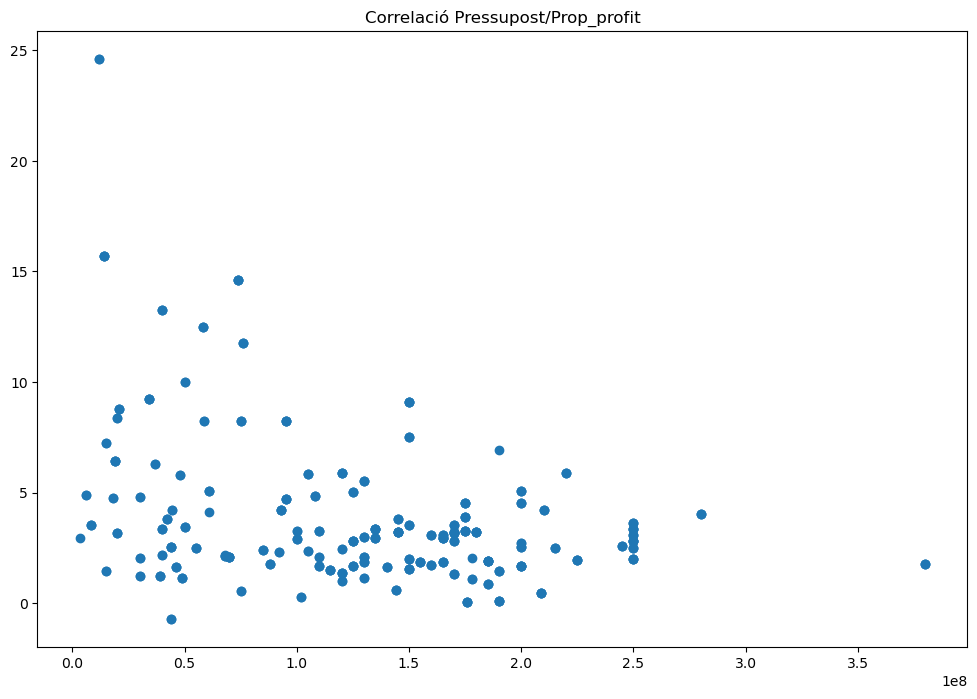

In [1842]:
#Scatter plot
# Set the figure style and initalize a new figure
fig = plt.figure(figsize=(12,8))

# Create a title and axis labels
plt.title('Correlació Pressupost/Prop_profit')
plt.scatter(peliculesMesValorades2010['budget'], peliculesMesValorades2010['prop_profit'])
# Show the plot
plt.show()
# La proporció és més gran com menys diners s'inverteixi a la película

En la mateixa gràfica anem incloure les valoracions de les pel·lìcules, aparentment imaginem que les pel·lìcules que han tingut bona acollida son les que mé beneficis han aportat. Veient la gràfica creada sembla certa aquesta afirmaciò?

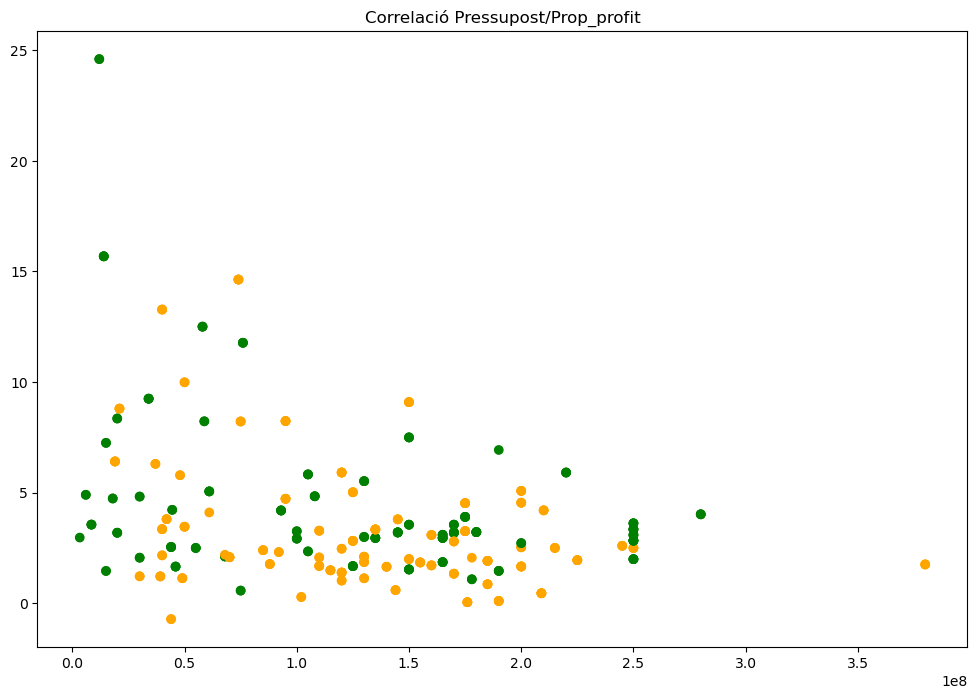

In [1843]:
#Hem de crear una llista de color per cada pel·lìcula
colors=[]

# Iteració sobre cada fila del dataset, si vote_average >= 7 --> verd / >=5 taronja /5 vermell
for n in peliculesMesValorades2010['vote_average']:
    if (n >= 7):
        colors.append('green')
    elif (n < 5):
        colors.append('red')
    else:
        colors.append('orange')

#Crea de nou la gràfica amb l'opció color

# Set the figure style and initalize a new figure
fig = plt.figure(figsize=(12,8))

# Create a title and axis labels

plt.title('Correlació Pressupost/Prop_profit')
plt.scatter(peliculesMesValorades2010['budget'], peliculesMesValorades2010['prop_profit'], c=colors)
# Show the plot
plt.show()
# Les valoracións poden ajudar, pero no sempre significa que tinguin pocs beneficis.
    

Finalment per determinar quina tipus de pel·lìcula realitzarem visualitzarem els gèneres que ofereixen millor relació en quant a proporció de benefici. Mirant l'apartat anterior i aquest, quin seria els gèneres de la teva pel·lìcula? Fica imagina i proposa una temàtica. 

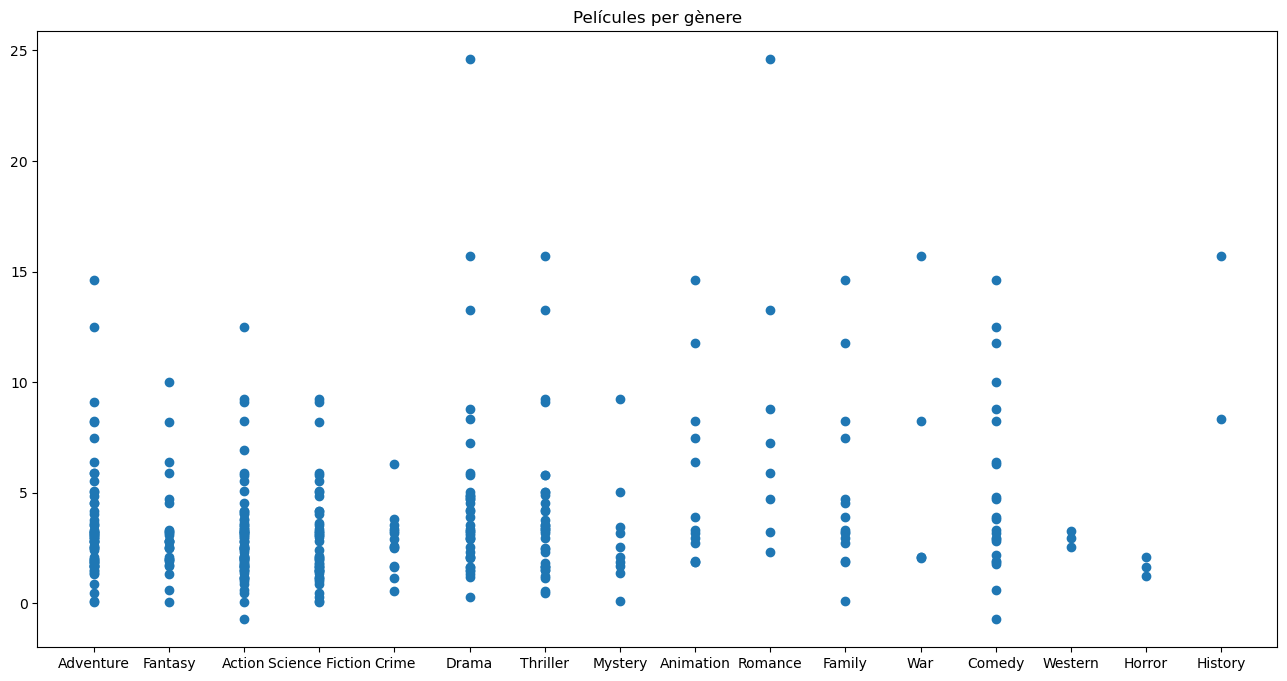

In [1844]:
# Merge amb genre

#Mostrem gràfic de barres per gènere
fig = plt.figure(figsize=(16,8))
plt.scatter(peliculesMesValorades2010['genre'], peliculesMesValorades2010['prop_profit'])
plt.title("Películes per gènere")
plt.show()


In [1845]:
# Mostrem gèneres i proposem temàtica
peliculesMesValorades2010.groupby("genre").agg({'prop_profit':'mean'}).sort_values(by='prop_profit',ascending=False)
# La película hauría de ser d'historia, romance i guerra

,prop_profit
genre,
History,12.016275
Romance,8.763101
War,6.033667
Animation,5.406012
Comedy,5.161365
Family,4.971221
Drama,4.726500
Thriller,4.051766
Adventure,3.541074


## 'Segundas partes no son buenas'

La nostra pel·lìcula ha tingut molt bona acollida tant que estem valorant la possibilitat de realitzar una segona part. Existeix la idea de que les seqüeles son sempre pitjors. Mostra la diferència promig entre les pel·lìcules i les seves seqüeles i les 5 pel·lìcules on les seves continuacions han millorat mès.

In [1846]:
# mostrem dataset
print(sequels_ds.head())
# Elimina files que no tenen sequel
sequels_ds = sequels_ds.dropna()

# comprova que no hi ha NA
print(sequels_ds.head())

# join amb movies per obtenir noms de original i de sequels
movies_sequels_ds = pd.merge(movies_ds, sequels_ds, left_on='id', right_on='sequel')

# simplifiquem per quedar-nos únicament amb id_original, titol_original, id_sequel, titol_sequel
movies_sequels_ds = movies_sequels_ds.rename(columns={'id_y':'id_original','title_y':'titol_original','id_x':'id_sequel','title_x':'titol_sequel'})
movies_sequels_ds = movies_sequels_ds.loc[:,['id_original', 'titol_original', 'id_sequel', 'titol_sequel']]
movies_sequels_ds.head()

      id         title  sequel
0  19995        Avatar    <NA>
1    862     Toy Story     863
2    863   Toy Story 2   10193
3    597       Titanic    <NA>
4  24428  The Avengers    <NA>
     id                                              title  sequel
1   862                                          Toy Story     863
2   863                                        Toy Story 2   10193
30  675          Harry Potter and the Order of the Phoenix     767
32  121              The Lord of the Rings: The Two Towers     122
44  120  The Lord of the Rings: The Fellowship of the Ring     121


,id_original,titol_original,id_sequel,titol_sequel
0,863,Toy Story 2,10193,Toy Story 3
1,425,Ice Age,950,Ice Age: The Meltdown
2,808,Shrek,809,Shrek 2
3,49018,Insidious,91586,Insidious: Chapter 2
4,657,From Russia with Love,658,Goldfinger


In [1847]:
# Merge per duplicat per obentenir les valoracions
movies_sequels_ratings_ds = pd.merge(movies_sequels_ds, ratings_ds, left_on='id_original', right_on='id')

# creem nova columna amb la diferenta valoracació sequel i original
movies_sequels_ratings_ds = pd.merge(movies_sequels_ratings_ds, ratings_ds, left_on='id_sequel', right_on='id', suffixes=('_og','_sq'))
movies_sequels_ratings_ds['diferencia'] = movies_sequels_ratings_ds['vote_average_og'] - movies_sequels_ratings_ds['vote_average_sq']

#mostre mitja
mitja = movies_sequels_ratings_ds[['titol_original','titol_sequel','diferencia']]
mitja


,titol_original,titol_sequel,diferencia
0,Toy Story 2,Toy Story 3,-0.3
1,Ice Age,Ice Age: The Meltdown,0.6
2,Shrek,Shrek 2,0.6
3,Insidious,Insidious: Chapter 2,0.3
4,From Russia with Love,Goldfinger,-0.3
...,...,...,...
85,Indiana Jones and the Last Crusade,Indiana Jones and the Kingdom of the Crystal S...,1.9
86,The Hustler,The Color of Money,0.9
87,21 Jump Street,22 Jump Street,-0.3
88,Madea's Family Reunion,Madea Goes to Jail,-0.4


In [1848]:
# Mostra les 5 millor sequeles en comparació a la seva predecesora
mitja.sort_values(by='diferencia', ascending=False).head()

,titol_original,titol_sequel,diferencia
85,Indiana Jones and the Last Crusade,Indiana Jones and the Kingdom of the Crystal S...,1.9
16,Batman Returns,Batman Forever,1.4
9,The Boondock Saints,The Boondock Saints II: All Saints Day,1.3
78,Casino Royale,Quantum of Solace,1.2
65,Wall Street,Wall Street: Money Never Sleeps,1.2




---



## UPGRADE - CASTING


A partir del dataset actors, fes l'anàlisis que consideris adient per escollir els nostres actors/actrius